# Credit Card Fraud Detection

### Importing required Libraries & Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [ ]:
import pandas as pd , numpy as np , matplotlib.pyplot as plt , seaborn as sns , warnings
%matplotlib inline
# with this code you can ignore warning that you will going to get while running code
warnings.filterwarnings('ignore')

df = pd.read_csv(r'creditcard.csv') # r/u - Unicode data we are numeric extracted feature in our dataset all are number only

df.head()
# kaggle is on website to do Ml challenges.So they hide feature name so make code complex and only person who has done such code before they will going to do this or havinf extreme practical knowledge

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0

[5 rows x 31 columns]

### Getting Deeper into Data

In [ ]:
df.tail()

Time         V1         V2  ...       V28  Amount  Class
284802  172786.0 -11.881118  10.071785  ...  0.823731    0.77      0
284803  172787.0  -0.732789  -0.055080  ... -0.053527   24.79      0
284804  172788.0   1.919565  -0.301254  ... -0.026561   67.88      0
284805  172788.0  -0.240440   0.530483  ...  0.104533   10.00      0
284806  172792.0  -0.533413  -0.189733  ...  0.013649  217.00      0

[5 rows x 31 columns]

In [ ]:
df.shape # row X column , it means that I am having 284807 rows and 31 column in my dataset

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.Class.value_counts() # best '0 ' non fraud transaction - 284315 , and '1' fruad trnsaction - 492

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
df.describe() # count,mean std dev, min , 25% ,mav

Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  3.919560e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%    139320.500000  1.315642e+00  ...      77.165000       0.000000
max    172792.000000  2.454930e+00  ...   25691.160000       1.000000

[8 rows x 31 columns]

### Dealing with Missing Values ( i.e Null Values )

In [ ]:
tdf = pd.DataFrame(df.isnull().sum(),columns = ['A']) # check for null ,missing value,tdf temporary variable and it is assign with 
tdf[tdf.A > 0]    # No null values Found

Empty DataFrame
Columns: [A]
Index: []

## Exploratory Data Analysis ( EDA )

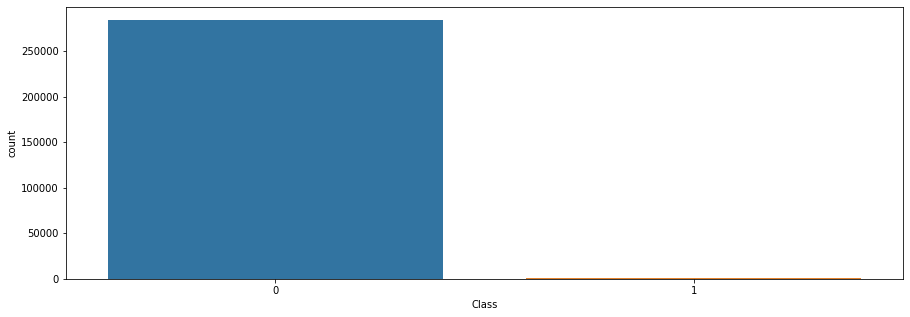

In [ ]:
plt.figure(figsize=(15,5))       # Expanding size
sns.countplot(df['Class']) # EDA mean you do feature engineering, feature scaling,feature transformation,Feature selection,analysis of data, mining of data

# Taking Sample of Dataset to reduce Execuation time

In [ ]:
adf = df[df['Class'] == 0].iloc[:10000,:] # just because my dataset all data are numeric I have take categorial variable as output label and you can take FRAUD / NON- FRAUD
bdf = df[df['Class'] == 1] # batch of 10000 out of 284102 non fraud
adf = adf.reset_index().drop('index',axis=1)
bdf = bdf.reset_index().drop('index',axis=1)

data = pd.concat([adf,bdf])

print(adf.shape,bdf.shape,data.shape) # 10000 + 10492 as non-fraud data, with 31 column #492 rows as Fraud with 31 column

(10000, 31) (492, 31) (10492, 31)


## Exploratory Data Analysis of sample Dataset ( EDA )

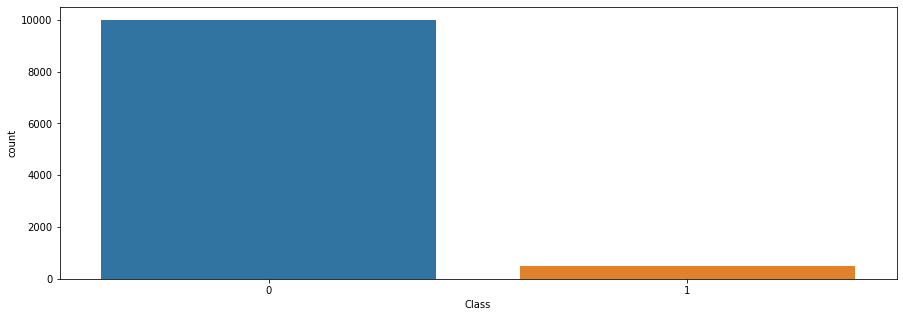

In [ ]:
plt.figure(figsize=(15,5))       # Expanding size
sns.countplot(data['Class'])

## Feature Engineering & Feature Selection

### 30 Features Reduced to 20 Features

In [ ]:
c= data.corr()    # Finding correlation

i = 0

# replacing diogonal corr() which is 1 to NaN for finding
#i.e manulating and get the informative features by removing high values of correlation.

while True:    
    try:
        c.iloc[i,i] = np.nan
        i += 1
    except:
        break

In [ ]:
# Getting high corr. values w.r.t output because it supports the output... Height and Weight, Height = inc weight  incre
# corr  = -1 to 1, 1 means highly correlated and -1  = not much correlated, 1 =0.01, 0.1, 0.9, 0.1

features = c[(c['Class'] > 0.1) | (c['Class'] < -0.1)].dropna(how = 'all')['Class']     
features_col = list(features.index)
print(features.shape, len(features_col))     # Exactly what i want....

(20,) 20


In [ ]:
sns.pairplot(data[features_col])

## Comparing Models

In [ ]:
# Preparing  pipeline for all the models
# Here RandomForest wins the race...

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.svm import SVC
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix,classification_report


X = data[features_col]
y = data.Class
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=3)


def model(X,y):
    models = [LogisticRegression(penalty='l2'),DecisionTreeClassifier() 
              ,RandomForestClassifier(),KNeighborsClassifier(),SVC(),IsolationForest()]
    
    for model in models:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        print(accuracy_score(y_test,y_pred),type(model).__name__,print(confusion_matrix(y_test,y_pred)) 
             ,print(classification_report(y_test,y_pred)),type(model).__name__)

model(X,y)
# I have shown you comparision between different algorithm accuracy, confution matxix
# I did 

[[2495    5]
 [   0  123]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2500
           1       0.96      1.00      0.98       123

    accuracy                           1.00      2623
   macro avg       0.98      1.00      0.99      2623
weighted avg       1.00      1.00      1.00      2623

0.9980937857415173 LogisticRegression None None LogisticRegression
[[2498    2]
 [   0  123]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2500
           1       0.98      1.00      0.99       123

    accuracy                           1.00      2623
   macro avg       0.99      1.00      1.00      2623
weighted avg       1.00      1.00      1.00      2623

0.9992375142966069 DecisionTreeClassifier None None DecisionTreeClassifier
[[2500    0]
 [   0  123]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2500
           1  

### Here RandomForest Clearly Wins the race with 100 percent accuracy

# Building Final Model ( RandomForestClassifier )

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.svm import SVC
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix,classification_report


X = data[features_col]
y = data.Class
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=3)



model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred),type(model).__name__)

1.0 RandomForestClassifier


In [ ]:
y_test.value_counts() # 2500 non- fraud , # 123 fraud

0    2500
1     123
Name: Class, dtype: int64

In [ ]:
print(confusion_matrix(y_test,y_pred))# 2500 non- fraud , # 123 fraud

[[2500    0]
 [   0  123]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2500
           1       1.00      1.00      1.00       123

    accuracy                           1.00      2623
   macro avg       1.00      1.00      1.00      2623
weighted avg       1.00      1.00      1.00      2623



In [ ]:
len(y_pred)  # performance optimization data will get reduced, feature will reduced vy lasso regularization and correlation technique

2623

### Most Informative features for Predicting "Credit Card Fraud Detection"

In [ ]:
X.columns # drop column V22 to V30 in performance optimization and learning and making model more precise and accuracte

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21'],
      dtype='object')

In [ ]:
len(X.columns)

20

# ...END...